In [185]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
from datetime import datetime


In [65]:
traffic_df = pd.read_csv("Traffic.csv")

In [66]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [67]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [68]:
traffic_df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [69]:
traffic_df["Time"].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [70]:
traffic_df["Date"].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype=int64)

In [71]:
traffic_df["Day of the week"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [72]:
traffic_df["BikeCount"].unique()

array([ 0,  6,  4, 22, 16, 28, 11, 24, 27, 20, 29, 12, 13, 39, 23, 37, 18,
       36, 10,  7,  8,  9, 15, 19, 26, 17, 31, 25, 30, 34,  5, 14, 21,  1,
        2,  3, 32, 38, 35, 47, 52, 59, 43, 56, 68, 70, 46, 44, 67, 57, 42,
       63, 62, 49, 65, 50, 64, 40, 33, 48, 45, 66, 55, 69, 41, 60, 54, 53,
       61, 51, 58], dtype=int64)

In [73]:
traffic_df["Traffic Situation"].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [ ]:
#Exploring the relationship between the numerical columns
numerical_columns = traffic_df.select_dtypes(exclude = "object")
sns.pairplot(numerical_columns)

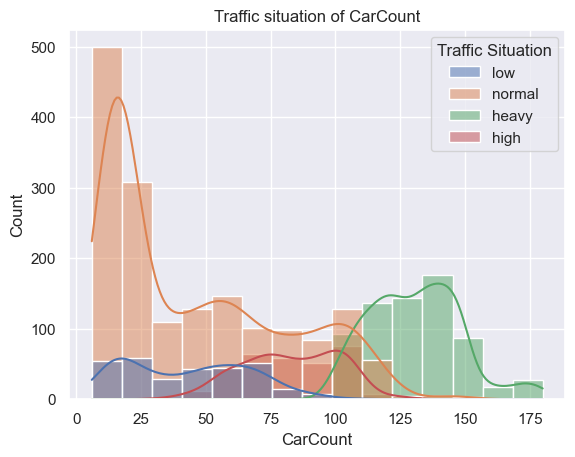

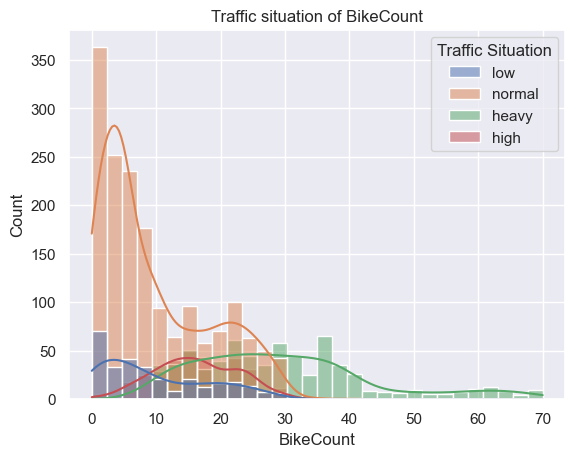

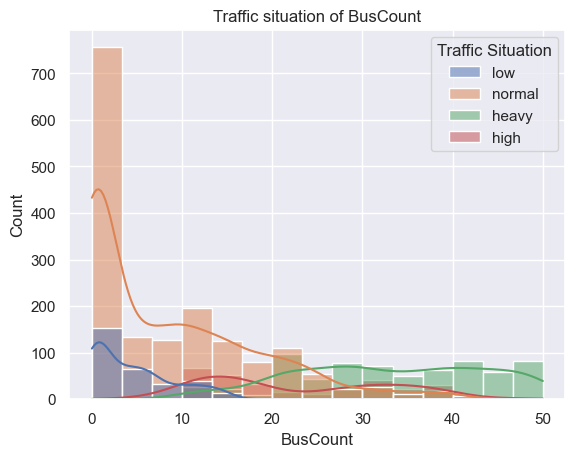

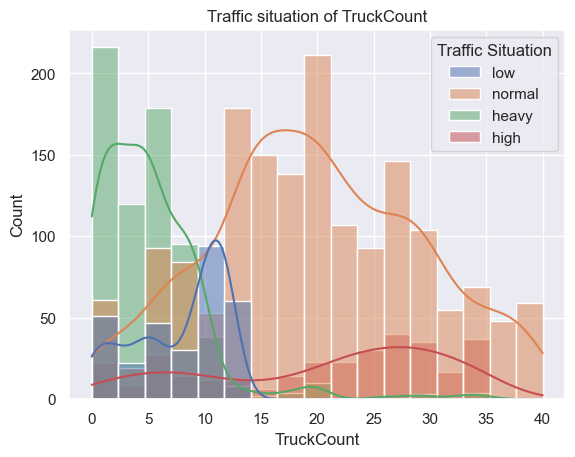

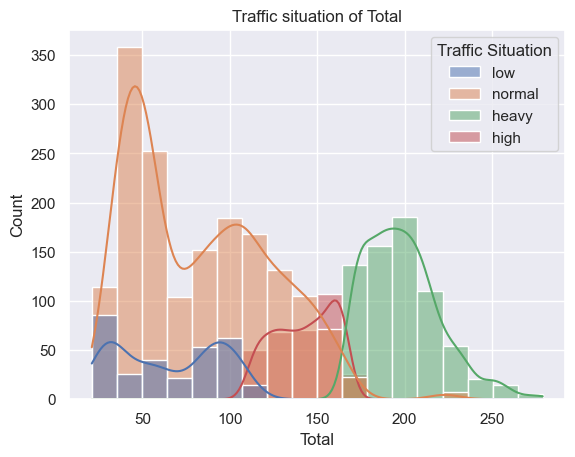

In [96]:
counts = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

for i in counts:
    sns.histplot(traffic_df, x = i, hue = "Traffic Situation", kde = True)
    plt.title(f"Traffic situation of {i}")
    plt.show()

In [161]:
hour = traffic_df.loc[(traffic_df["Time"].str[3:5] == '00') | (traffic_df["Time"].str[2:4] == '00')]
hour["Time"].unique()

array(['12:00:00 AM', '1:00:00 AM', '2:00:00 AM', '3:00:00 AM',
       '4:00:00 AM', '5:00:00 AM', '6:00:00 AM', '7:00:00 AM',
       '8:00:00 AM', '9:00:00 AM', '10:00:00 AM', '11:00:00 AM',
       '12:00:00 PM', '1:00:00 PM', '2:00:00 PM', '3:00:00 PM',
       '4:00:00 PM', '5:00:00 PM', '6:00:00 PM', '7:00:00 PM',
       '8:00:00 PM', '9:00:00 PM', '10:00:00 PM', '11:00:00 PM'],
      dtype=object)

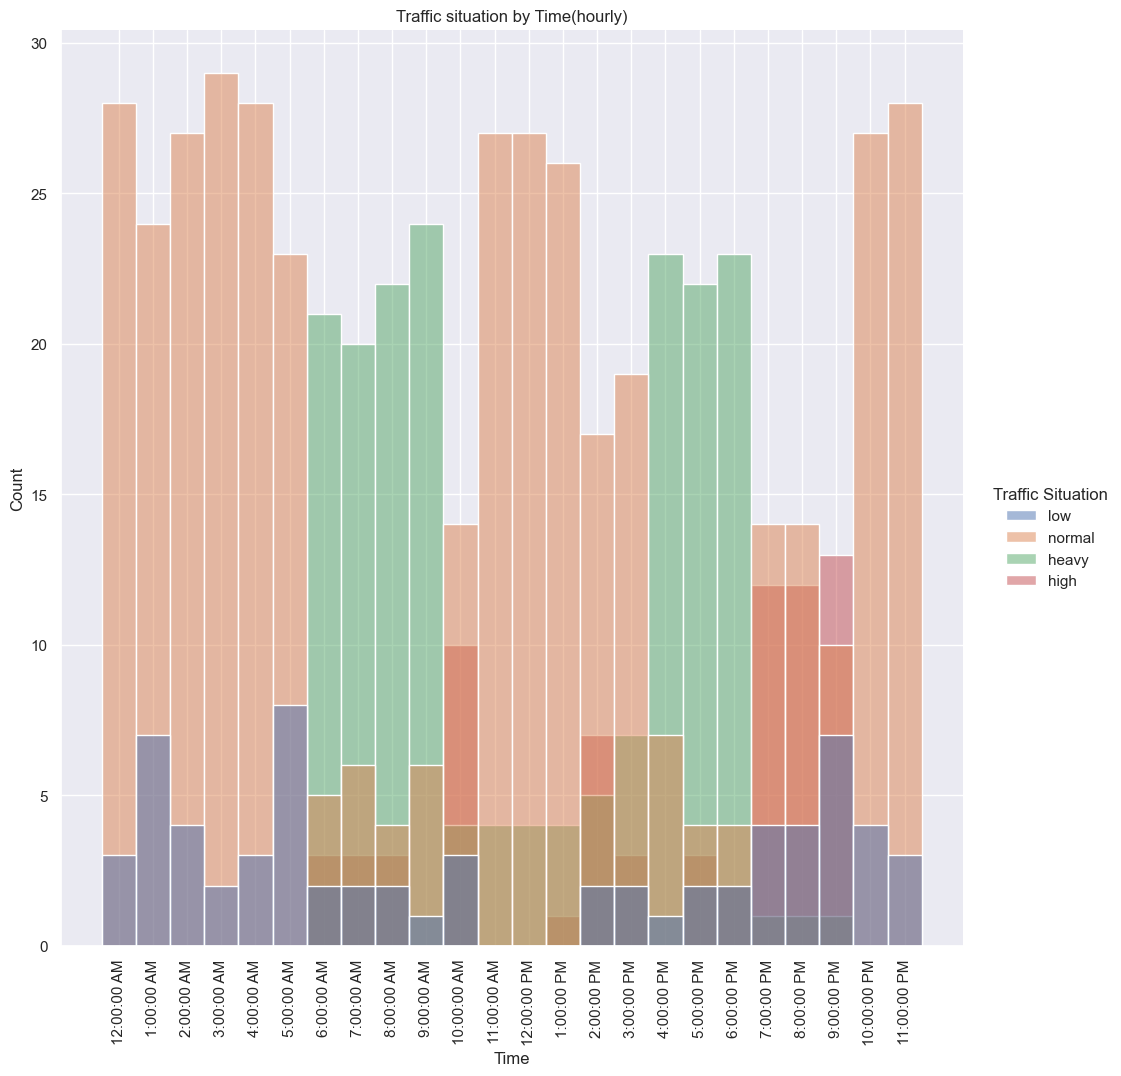

In [183]:
sns.displot(hour, x = hour["Time"], hue = "Traffic Situation", height = 10)
plt.title("Traffic situation by Time(hourly)")
plt.xticks(rotation = 90)
plt.show()



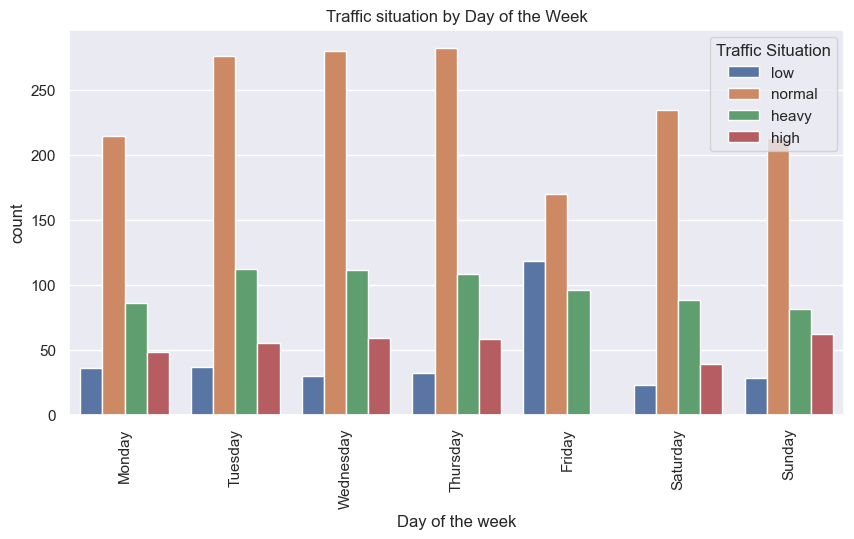

In [181]:
plt.figure(figsize = (10,5))
sns.countplot(traffic_df, x = traffic_df["Day of the week"], hue = "Traffic Situation", order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Traffic situation by Day of the Week")
plt.xticks(rotation = 90)
plt.show()

In [184]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [194]:
# changing the time to seconds
def time_converter(time_str):
    time_format = datetime.strptime(time_str, "%I:%M:%S %p")
    hrs, mins, secs = time_format.hour, time_format.minute, time_format.second
    time_sec = (hrs * 3600) + (mins * 60) + secs
    return time_sec

In [197]:
traffic_df["Time"] = traffic_df["Time"].apply(lambda x: time_converter(x))

In [198]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,10,Tuesday,31,0,4,4,39,low
1,900,10,Tuesday,49,0,3,3,55,low
2,1800,10,Tuesday,46,0,3,6,55,low
3,2700,10,Tuesday,51,0,2,5,58,low
4,3600,10,Tuesday,57,6,15,16,94,normal
